In [2]:
import os
from utils_finetune import create_model_wrapper
from viz import generate_latent_space
import pandas as pd

In [4]:
main_dir = '/Users/jonaheaton/Desktop/stanford_umap_may29'
data_dir = os.path.join('/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/stanford-hmp2') # data_v1 is only the baseline data

In [145]:
# model_dir = os.path.join(main_dir,'train_model')
# encoder = create_model_wrapper(f'{model_dir}/encoder_info.json',f'{model_dir}/encoder_state.pt')
# head = create_model_wrapper(f'{model_dir}/head_info.json',f'{model_dir}/head_state.pt',is_encoder=False)

model_dir = os.path.join(main_dir,'trainval_model')
encoder = create_model_wrapper(f'{model_dir}/encoder_info.json',f'{model_dir}/encoder_state.pt')
head = create_model_wrapper(f'{model_dir}/head_info.json',f'{model_dir}/head_state.pt',is_encoder=False)

In [82]:
X = pd.read_csv(os.path.join(data_dir, 'finetune_ready_data_matrix.csv'), index_col=0)
y = pd.read_csv(os.path.join(data_dir, 'finetune_ready_metadata.csv'), index_col=0)

In [83]:
hmp_healthy = y[(y['SubStudy'] =='HMP') & (y['Event'] == 'Healthy')].copy()
exercise_baseline = y[(y['SubStudy'] =='Exercise') & (y['Event_Note1'] == 'Baseline')].copy()
exercise_2min = y[(y['SubStudy'] =='Exercise') & (y['Event_Note1'] == '2 min')].copy()
exercise_15min = y[(y['SubStudy'] =='Exercise') & (y['Event_Note1'] == '15 min')].copy()
exercise_30min = y[(y['SubStudy'] =='Exercise') & (y['Event_Note1'] == '30 min')].copy()
exercise_01hour = y[(y['SubStudy'] =='Exercise') & (y['Event_Note1'] == '1 hour')].copy()
exercise_02hour = y[(y['SubStudy'] =='Exercise') & (y['Event_Note1'] == '2 hours')].copy()
exercise_06hour = y[(y['SubStudy'] =='Exercise') & (y['Event_Note1'] == '6 hours')].copy()
exercise_24hour = y[(y['SubStudy'] =='Exercise') & (y['Event_Note1'] == '24 hours')].copy()

exercise_all = y[(y['SubStudy'] =='Exercise')].copy()

In [84]:
X_train_val = X.loc[hmp_healthy.index.union(exercise_baseline.index)]
y_train_val = y.loc[hmp_healthy.index.union(exercise_baseline.index)]

In [86]:
X_test = X.loc[exercise_2min.index.union(exercise_15min.index).union(exercise_30min.index).union(exercise_01hour.index).union(exercise_02hour.index).union(exercise_06hour.index).union(exercise_24hour.index)]
y_test = y.loc[exercise_2min.index.union(exercise_15min.index).union(exercise_30min.index).union(exercise_01hour.index).union(exercise_02hour.index).union(exercise_06hour.index).union(exercise_24hour.index)]

X_train_val.to_csv(os.path.join(data_dir, 'data_v3','X_stanford-hmp_trainval.csv'), index=True)
y_train_val.to_csv(os.path.join(data_dir, 'data_v3','y_stanford-hmp_trainval.csv'), index=True)

X_test.to_csv(os.path.join(data_dir, 'data_v3','X_stanford-hmp_test.csv'), index=True)
y_test.to_csv(os.path.join(data_dir, 'data_v3','y_stanford-hmp_test.csv'), index=True)

In [131]:
import umap

In [136]:
import torch

In [164]:
X_train_val.shape

(271, 2736)

In [226]:
# Z_trainval = encoder(torch.tensor(X_train_val.values).float()).detach().numpy()
# Z_test = encoder(torch.tensor(X_test.values).float()).detach().numpy()

Z_trainval = generate_latent_space(X_train_val, encoder=encoder)
Z_test = generate_latent_space(X_test, encoder=encoder)

In [342]:
reducer2 = umap.UMAP(n_components=2, random_state=40, n_neighbors=15, min_dist=0.1, metric='euclidean')
trainval_embedding2 = reducer2.fit_transform(Z_trainval)
trainval_embedding2 = pd.DataFrame(trainval_embedding2, index=Z_trainval.index)
test_embedding2 = reducer2.transform(Z_test)
test_embedding2 = pd.DataFrame(test_embedding2, index=Z_test.index)

/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [344]:
reducer2

UMAP(random_state=40, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [343]:
trainval_embedding2.loc['Exercise_HILIC-pos_ZJXC41N-E11.mzML']

0    1.156199
1    5.564522
Name: Exercise_HILIC-pos_ZJXC41N-E11.mzML, dtype: float32

In [245]:
reducer = umap.UMAP(n_components=2, random_state=40, n_neighbors=15, min_dist=0.1, metric='euclidean')
trainval_embedding = reducer.fit_transform(Z_trainval)
trainval_embedding = pd.DataFrame(trainval_embedding, index=Z_trainval.index)
test_embedding = reducer.transform(Z_test)
test_embedding = pd.DataFrame(test_embedding, index=Z_test.index)

/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [246]:
trainval_embedding.loc['Exercise_HILIC-pos_ZJXC41N-E11.mzML']

0    1.156199
1    5.564522
Name: Exercise_HILIC-pos_ZJXC41N-E11.mzML, dtype: float32

In [334]:
# trainval_embedding.to_csv(os.path.join(data_dir, 'data_v3','trainval_embedding_may30.csv'), index=True)
# test_embedding.to_csv(os.path.join(data_dir, 'data_v3','test_embedding_may30.csv'), index=True)

In [247]:
hmp_healthy_bmi = hmp_healthy['BMI']
exercise_baseline_bmi = exercise_baseline['BMI']
exercise_all_bmi = exercise_all['BMI']

In [248]:
# embeddings = pd.concat([pd.DataFrame(trainval_embedding, index=Z_trainval.index, columns=['UMAP1','UMAP2']),
#                         pd.DataFrame(test_embedding, index=Z_test.index, columns=['UMAP1','UMAP2'])])

embeddings = pd.concat([trainval_embedding, test_embedding])
embeddings.columns = ['UMAP1','UMAP2']

In [317]:
df = pd.concat([y_train_val, y_test])
df = pd.concat([df, embeddings], axis=1)
df['BMI Group'] = pd.cut(df['BMI'], bins=[0, 25, 30,100], labels=['Normal', 'Overweight', 'Obese'])

In [335]:
df.loc['Exercise_HILIC-pos_ZJXC41N-E11.mzML']

subject ID                                          ZJXC41N
Study                                                   HMP
Race                                                      B
Age                                                   49.69
BMI                                                   28.24
SSPG                                                   75.0
IR_IS_classification                                     IS
CollectionDate                                       1495.0
Event                                              Exercise
Event_Note1                                        Baseline
Event_Note2                                             NaN
Event_Note3                                             NaN
SubStudy                                           Exercise
file name                    Exercise_HILIC-pos_ZJXC41N-E11
mzml_file.1             Exercise_HILIC-pos_ZJXC41N-E11.mzML
timestamp                               2017-08-08 22:34:44
Ref                                     

In [251]:
# df = pd.DataFrame({'UMAP1': Z_hmp_healthy_transformed[:,0], 'UMAP2': Z_hmp_healthy_transformed[:,1], 'BMI': hmp_healthy_bmi, 'Study': 'HMP'})
# df2 = pd.DataFrame({'UMAP1': Z_exercise_all_transformed[:,0], 'UMAP2': Z_exercise_all_transformed[:,1], 'BMI': exercise_all_bmi, 'Study': 'Exercise', 'Event': exercise_all['Event_Note1']})

# df = pd.concat([df, df2])

# df['BMI Group'] = pd.cut(df['BMI'], bins=[0, 25, 30,100], labels=['Normal', 'Overweight', 'Obese'])

In [252]:
def convert_event_to_time(event):
    if event == 'Baseline':
        return 0
    elif event == '2 min':
        return 2
    elif event == '15 min':
        return 15
    elif event == '30 min':
        return 30
    elif event == '1 hour':
        return 60
    elif event == '2 hours':
        return 120
    elif event == '6 hours':
        return 360
    elif event == '24 hours':
        return 1440

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from misc import assign_color_map

In [318]:
df['Exercise'] = df['Event_Note1'].copy()
df['Exercise Time'] = df['Exercise'].apply(convert_event_to_time)
df['Exercise Time'] = np.log2(df['Exercise Time'] + 1)

In [256]:
df.loc['Exercise_HILIC-pos_ZJXC41N-E11.mzML']

subject ID                                          ZJXC41N
Study                                                   HMP
Race                                                      B
Age                                                   49.69
BMI                                                   28.24
SSPG                                                   75.0
IR_IS_classification                                     IS
CollectionDate                                       1495.0
Event                                              Exercise
Event_Note1                                        Baseline
Event_Note2                                             NaN
Event_Note3                                             NaN
SubStudy                                           Exercise
file name                    Exercise_HILIC-pos_ZJXC41N-E11
mzml_file.1             Exercise_HILIC-pos_ZJXC41N-E11.mzML
timestamp                               2017-08-08 22:34:44
Ref                                     

In [330]:
from misc import assign_color_map


def create_nice_embedding_plot(embedding, hue_col, metadata,is_umap=True):
        
    Z_embed = embedding.copy()
    if is_umap:
        Z_embed.columns = ['UMAP1','UMAP2']
    else:
        Z_embed.columns = ['PCA1','PCA2']
    Z_embed[hue_col] = metadata.loc[Z_embed.index, hue_col].values

    Z_count_sum = (~Z_embed[hue_col].isnull()).sum()
    print(f'Number of samples: {Z_count_sum}')
    if Z_embed[hue_col].nunique() > 30:
        # if more than 30 unique values, then assume its continuous
        palette = 'flare'
        Z_counts = None
    else:
        # if fewer than 30 unique values, then assume its categorical
        # palette = get_color_map(Z_embed[hue_col].nunique())
        palette = assign_color_map(Z_embed[hue_col].unique().dropna())
        Z_counts = Z_embed[hue_col].value_counts()
    marker_sz = 200/np.sqrt(Z_count_sum)


    fig = sns.scatterplot(data=Z_embed, x='UMAP1', y='UMAP2', hue=hue_col, palette=palette,s=marker_sz)
    # place the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # edit the legend to include the number of samples in each cohort
    handles, labels = fig.get_legend_handles_labels()

    # Add the counts to the legend if hue_col is categorical
    if Z_counts is not None:
        # new_labels = [f'{label} ({Z_embed[Z_embed[hue_col]==label].shape[0]})' for label in labels]
        new_labels = []
        for label in labels:
            # new_labels.append(f'{label} ({Z_counts.loc[eval(label)]})')
            try:
                new_labels.append(f'{label} ({Z_counts.loc[label]})')
            except KeyError:
                new_labels.append(f'{label} ({Z_counts.loc[eval(label)]})')
    else:
        new_labels = labels

    # make the size of the markers in the handles larger
    for handle in handles:
        # print(dir(handle))
        handle.set_markersize(10)
        # handle._sizes = [100]

    plt.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=hue_col)
    xlims = plt.xlim()
    # add a margin
   
    return

Number of samples: 269


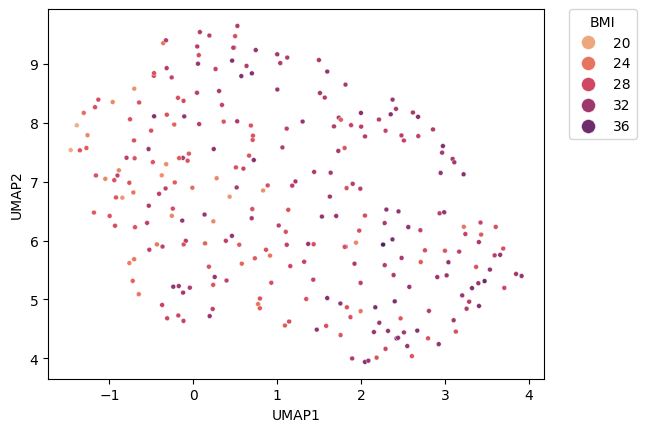

In [332]:
# add more separation between the dots
# add more margin to the plot
# show plots for only exercise baseline, and only HMP
# add more margin to the axis
# we like the color, but slightly increase the size of the dots
create_nice_embedding_plot(trainval_embedding, 'BMI', df, is_umap=True)

Number of samples in TrainVal: 269


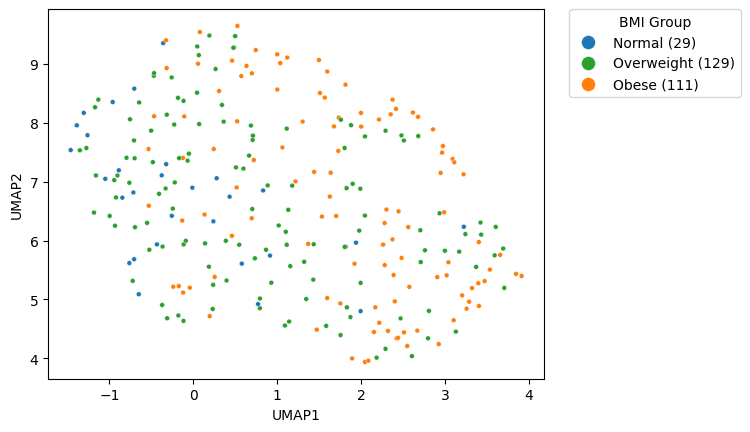

In [329]:
# Exactly from "utils_finetune.py"
hue_col = 'BMI Group'
eval_name = 'TrainVal'


Z_embed = trainval_embedding.copy()
Z_embed.columns = ['UMAP1','UMAP2']
Z_embed[hue_col] = df.loc[Z_embed.index, hue_col]

Z_count_sum = (~Z_embed[hue_col].isnull()).sum()
print(f'Number of samples in {eval_name}: {Z_count_sum}')
if Z_embed[hue_col].nunique() > 30:
    # if more than 30 unique values, then assume its continuous
    palette = 'flare'
    Z_counts = None
else:
    # if fewer than 30 unique values, then assume its categorical
    # palette = get_color_map(Z_embed[hue_col].nunique())
    palette = assign_color_map(Z_embed[hue_col].unique().dropna())
    Z_counts = Z_embed[hue_col].value_counts()
marker_sz = 200/np.sqrt(Z_count_sum)


fig = sns.scatterplot(data=Z_embed, x='UMAP1', y='UMAP2', hue=hue_col, palette=palette,s=marker_sz)
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# edit the legend to include the number of samples in each cohort
handles, labels = fig.get_legend_handles_labels()

# Add the counts to the legend if hue_col is categorical
if Z_counts is not None:
    # new_labels = [f'{label} ({Z_embed[Z_embed[hue_col]==label].shape[0]})' for label in labels]
    new_labels = []
    for label in labels:
        # new_labels.append(f'{label} ({Z_counts.loc[eval(label)]})')
        try:
            new_labels.append(f'{label} ({Z_counts.loc[label]})')
        except KeyError:
            new_labels.append(f'{label} ({Z_counts.loc[eval(label)]})')
else:
    new_labels = labels

# make the size of the markers in the handles larger
for handle in handles:
    # print(dir(handle))
    handle.set_markersize(10)
    # handle._sizes = [100]

plt.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=hue_col)



In [327]:
Z_embed[hue_col].unique().dropna()

['Overweight', 'Obese', 'Normal']
Categories (3, object): ['Normal' < 'Overweight' < 'Obese']

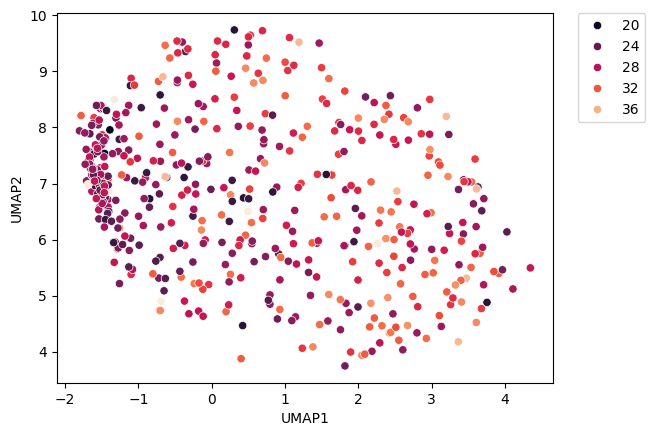

In [262]:
sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='BMI', palette='rocket')
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

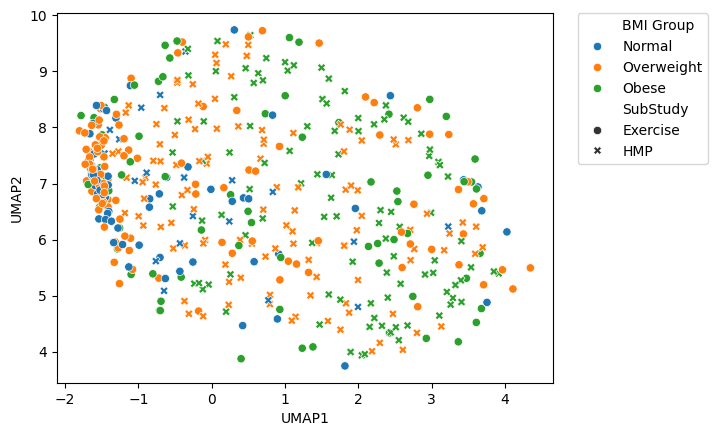

In [265]:
sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='BMI Group', style='SubStudy', palette='tab10')
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [266]:
exercise_subset = df[df['SubStudy']=='Exercise'].copy()
# exercise_subset = exercise_subset[exercise_subset['Exercise'].isin(['Baseline','2 min'])].copy()
exercise_subset = exercise_subset[exercise_subset['Exercise'].isin(['Baseline','1 hour'])].copy()
# exercise_subset = exercise_subset[exercise_subset['Exercise'].isin(['Baseline','15 min'])].copy()
exercise_subset_normal = exercise_subset[exercise_subset['BMI Group']=='Normal']
exercise_subset_overweight = exercise_subset[exercise_subset['BMI Group']=='Overweight']
exercise_subset_obese = exercise_subset[exercise_subset['BMI Group']=='Obese']

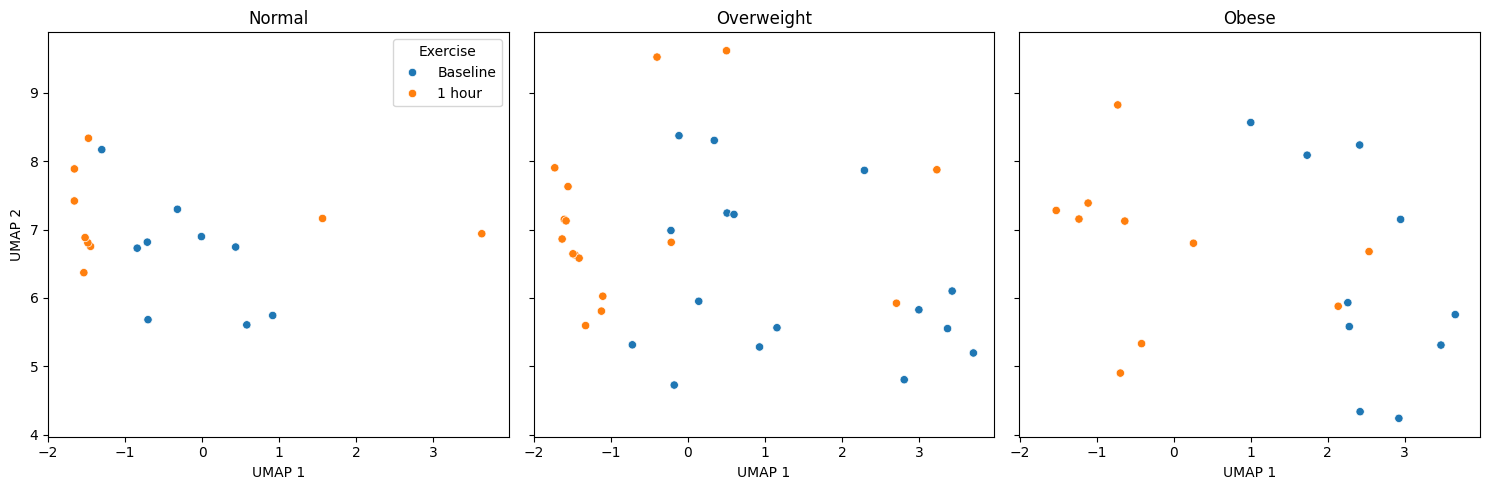

In [312]:
import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Define the labels for the subplots
labels = ['Normal', 'Overweight', 'Obese']

# Iterate over the subplots and plot the UMAP scatter plot for each group
for i, ax in enumerate(axes):
    # Get the subset of the dataframe for the current group
    subset = exercise_subset[exercise_subset['BMI Group'] == labels[i]]
    
    # Get the UMAP embedding values for the subset
    umap_values = subset[['UMAP1', 'UMAP2']].values
    
    
    # Scatter plot with UMAP values as x and y coordinates, and event time as color
    # ax.scatter(umap_values[:, 0], umap_values[:, 1], c=event_time, cmap='viridis')
    sns.scatterplot(data=subset, x='UMAP1', y='UMAP2', hue='Exercise', palette='tab10', ax=ax)
    # remove the legend
    if i > 0:
        ax.get_legend().remove()


    
    # Set the title and axis labels for the subplot
    ax.set_title(labels[i])
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')

# Add a colorbar to the last subplot
# cbar = plt.colorbar(ax=axes[-1])
# cbar.set_label('Event Time')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

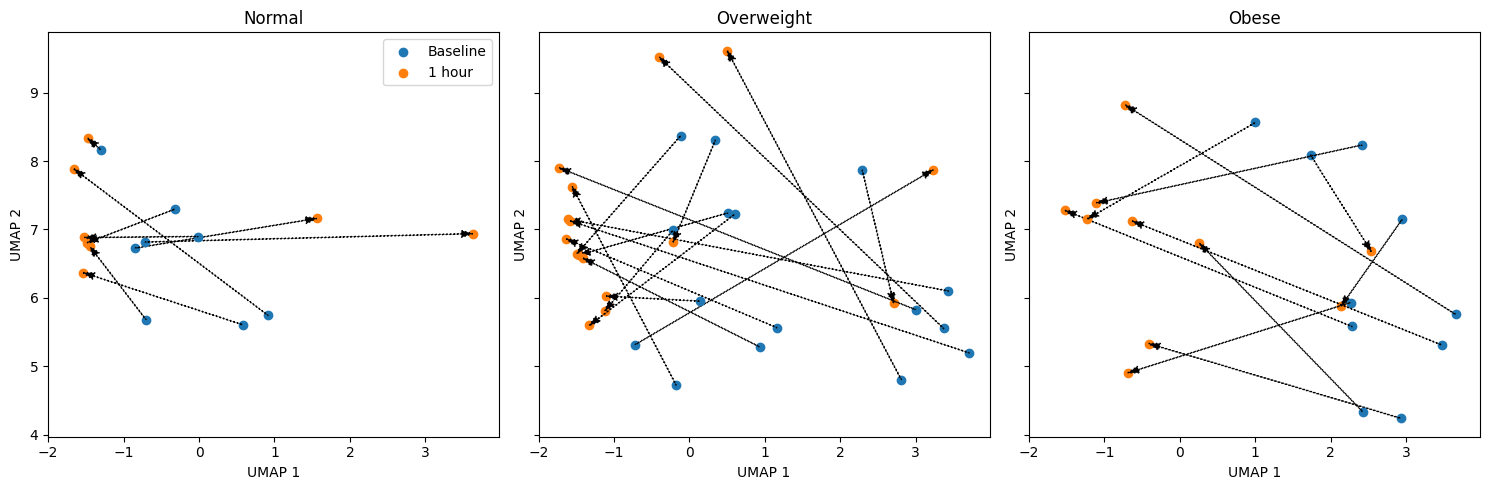

In [313]:
# Create a grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Define the labels for the subplots
labels = ['Normal', 'Overweight', 'Obese']

# Iterate over the subplots and plot the UMAP scatter plot for each group
for i, ax in enumerate(axes):
    # Get the subset of the dataframe for the current group
    subset = exercise_subset[exercise_subset['BMI Group'] == labels[i]]
    subset = subset.drop_duplicates(subset=['subject ID', 'Event_Note1'])
    matched_subset = subset.pivot(index='subject ID', columns='Event_Note1', values=['UMAP1','UMAP2'])
    
    for idx, row in matched_subset.iterrows():
        # Get the coordinates for the 'Baseline' and '1 hour' points
        baseline_x = row[('UMAP1', 'Baseline')]
        baseline_y = row[('UMAP2', 'Baseline')]
        hour_x = row[('UMAP1', '1 hour')]
        hour_y = row[('UMAP2', '1 hour')]

        # Draw a scatter plot for the 'Baseline' point
        ax.scatter(baseline_x, baseline_y, color='C0', label='Baseline' if idx == matched_subset.index[0] else "")
        
        # Draw a scatter plot for the '1 hour' point
        ax.scatter(hour_x, hour_y, color='C1', label='1 hour' if idx == matched_subset.index[0] else "")
        
        # Draw an arrow from the 'Baseline' point to the '1 hour' point
        ax.arrow(baseline_x, baseline_y, hour_x - baseline_x, hour_y - baseline_y, color='black', length_includes_head=True, 
                head_width=0.1,width=0.005,linestyle=':')

    # add a legend
    if i == 0:
        ax.legend()


    
    # Set the title and axis labels for the subplot
    ax.set_title(labels[i])
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')

# Add a colorbar to the last subplot
# cbar = plt.colorbar(ax=axes[-1])
# cbar.set_label('Event Time')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# 

selection a few,  highlight a few of these patients that have the biggest separation
pick obese from the "correct corners of the umap
have the rest of the data be gray in the background


In [270]:
subset = exercise_subset[exercise_subset['BMI Group'] == labels[i]]

In [279]:
df  =subset.pivot(index='subject ID', columns='Event_Note1', values=['UMAP1','UMAP2'])

In [303]:
subset = exercise_subset[exercise_subset['BMI Group'] == labels[i]]
subset = subset.drop_duplicates(subset=['subject ID', 'Event_Note1'])

matched_subset = subset.pivot(index='subject ID', columns='Event_Note1', values=['UMAP1','UMAP2'])

In [304]:
matched_subset

UMAP1               UMAP2          
Event_Note1    1 hour  Baseline    1 hour  Baseline
subject ID                                         
ZMBVNFM     -1.450298 -0.704319  6.754230  5.682089
ZOZOW1T      1.562023 -0.844649  7.162206  6.727844
ZPDABJR     -1.537417  0.578321  6.369447  5.606168
ZPEL6L3     -1.477509 -1.304712  8.335557  8.168847
ZTJ7L7Z      3.629132 -0.713220  6.939211  6.815889
ZTL5S2Y     -1.485173 -0.322425  6.806401  7.296712
ZUL3S6O     -1.521288 -0.010619  6.882787  6.896930
ZVNCGHM     -1.660033  0.914694  7.887104  5.743241

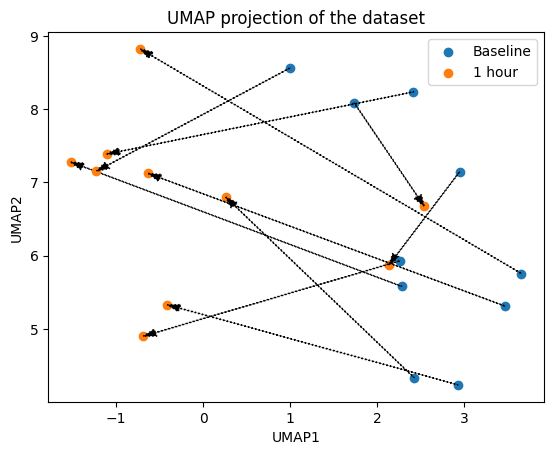

In [292]:
import matplotlib.pyplot as plt

# Iterate over the rows of the DataFrame
for idx, row in df.iterrows():
    # Get the coordinates for the 'Baseline' and '1 hour' points
    baseline_x = row[('UMAP1', 'Baseline')]
    baseline_y = row[('UMAP2', 'Baseline')]
    hour_x = row[('UMAP1', '1 hour')]
    hour_y = row[('UMAP2', '1 hour')]

    # Draw a scatter plot for the 'Baseline' point
    plt.scatter(baseline_x, baseline_y, color='C0', label='Baseline' if idx == df.index[0] else "")
    
    # Draw a scatter plot for the '1 hour' point
    plt.scatter(hour_x, hour_y, color='C1', label='1 hour' if idx == df.index[0] else "")
    
    # Draw an arrow from the 'Baseline' point to the '1 hour' point
    plt.arrow(baseline_x, baseline_y, hour_x - baseline_x, hour_y - baseline_y, color='black', length_includes_head=True, 
              head_width=0.1,width=0.005,linestyle=':')

# Add a title and labels to the plot
plt.title('UMAP projection of the dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [277]:
row

subject ID                                          ZJXC41N
Study                                                   HMP
Race                                                      B
Age                                                   49.69
BMI                                                   28.24
SSPG                                                   75.0
IR_IS_classification                                     IS
CollectionDate                                       1495.0
Event                                              Exercise
Event_Note1                                        Baseline
Event_Note2                                             NaN
Event_Note3                                             NaN
SubStudy                                           Exercise
file name                    Exercise_HILIC-pos_ZJXC41N-E11
mzml_file.1             Exercise_HILIC-pos_ZJXC41N-E11.mzML
timestamp                               2017-08-08 22:34:44
Ref                                     

In [271]:
subset.groupby('subject ID')[['UMAP1','UMAP2']].mean()

,subject ID,Study,Race,Age,BMI,SSPG,IR_IS_classification,CollectionDate,Event,Event_Note1,...,timestamp,Ref,runtime_hour,batch_id,run_order,UMAP1,UMAP2,BMI Group,Exercise,Exercise Time
mzml_file,,,,,,,,,,,,,,,,,,,,,
Exercise_HILIC-pos_ZKFV71L-E11.mzML,ZKFV71L,HMP,B,66.08,32.54,65.0,IS,1222.0,Exercise,Baseline,...,2017-08-07 09:24:28,0,5653.030000,2,875,2.947662,7.148658,Obese,Baseline,0.000000
Exercise_HILIC-pos_ZL63I8R-E11.mzML,ZL63I8R,HMP,C,62.88,32.94,220.0,IR,1063.0,Exercise,Baseline,...,2017-08-04 14:30:48,0,5586.135556,2,827,2.925184,4.238864,Obese,Baseline,0.000000
Exercise_HILIC-pos_ZLTUJTN-E11.mzML,ZLTUJTN,HMP,C,60.71,34.15,235.0,IR,1204.0,Exercise,Baseline,...,2017-08-07 12:04:51,0,5655.703056,2,881,2.421772,4.336304,Obese,Baseline,0.000000
Exercise_HILIC-pos_ZN3TBJM-E11.mzML,ZN3TBJM,HMP,C,67.47,30.18,133.5,IS,1266.0,Exercise,Baseline,...,2017-08-01 05:14:09,0,5504.858056,2,750,2.281450,5.580920,Obese,Baseline,0.000000
Exercise_HILIC-pos_ZN9YTFN-E11.mzML,ZN9YTFN,HMP,H,60.18,32.21,140.0,IS,1182.0,Exercise,Baseline,...,2017-08-07 16:59:00,0,5660.605556,2,892,3.657059,5.756205,Obese,Baseline,0.000000
Exercise_HILIC-pos_ZOBX723-E11.mzML,ZOBX723,HMP,C,58.02,30.98,NaN,Unknown,1467.0,Exercise,Baseline,...,2017-07-28 09:05:49,0,5412.719167,2,664,1.733927,8.087844,Obese,Baseline,0.000000
Exercise_HILIC-pos_ZPMBHPS-E11.mzML,ZPMBHPS,HMP,C,54.39,32.29,104.0,IS,1446.0,Exercise,Baseline,...,2017-07-30 17:11:29,0,5468.813611,2,707,1.002020,8.565757,Obese,Baseline,0.000000
Exercise_HILIC-pos_ZRB0F6P-E11.mzML,ZRB0F6P,HMP,H,53.68,38.90,223.0,IR,1232.0,Exercise,Baseline,...,2017-08-01 08:21:08,0,5507.974444,2,757,2.262341,5.930652,Obese,Baseline,0.000000
Exercise_HILIC-pos_ZWFDEY0-E11.mzML,ZWFDEY0,HMP,A,62.92,30.79,257.5,IR,1161.0,Exercise,Baseline,...,2017-08-09 03:01:39,0,5694.649722,2,916,2.415925,8.236545,Obese,Baseline,0.000000


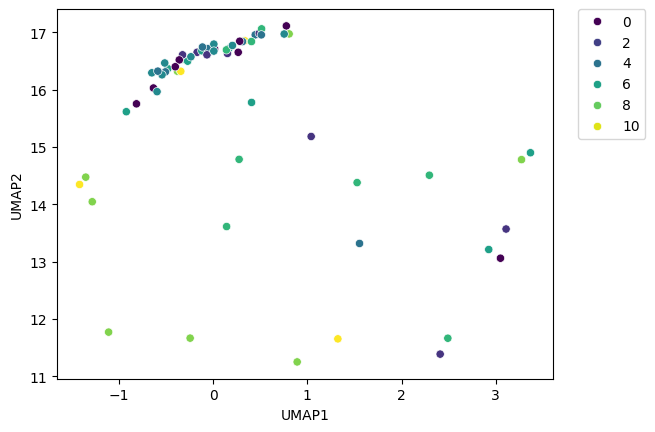

In [107]:
sns.scatterplot(data=exercise_subset_normal, x='UMAP1', y='UMAP2', hue='Event Time', palette='viridis')
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

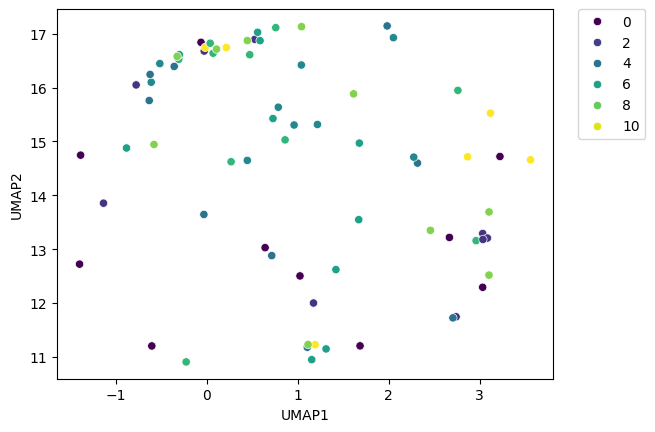

In [101]:
sns.scatterplot(data=exercise_subset_obese, x='UMAP1', y='UMAP2', hue='Event Time', palette='viridis')
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

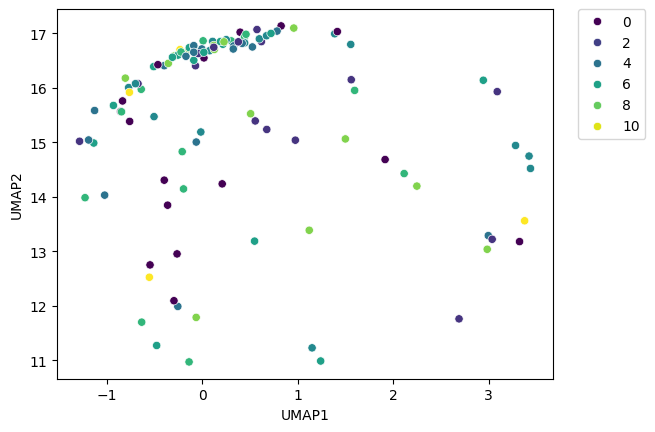

In [105]:
sns.scatterplot(data=exercise_subset_overweight, x='UMAP1', y='UMAP2', hue='Event Time', palette='viridis')
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

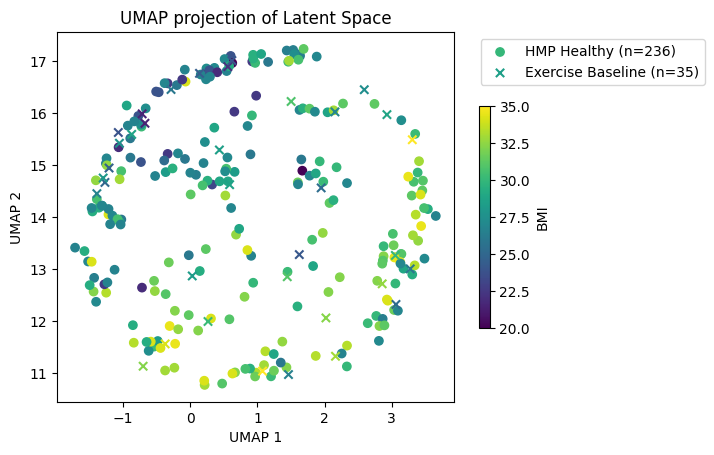

In [104]:
import matplotlib.pyplot as plt

cnorm=plt.Normalize(vmin=20, vmax=35)

# Create a scatter plot of the UMAP transformed data
label1 = 'HMP Healthy (n={})'.format(len(hmp_healthy))
label2 = 'Exercise Baseline (n={})'.format(len(exercise_baseline))
scatter1 = plt.scatter(Z_hmp_healthy_transformed[:, 0], Z_hmp_healthy_transformed[:, 1], c=hmp_healthy_bmi, label=label1, cmap='viridis',norm=cnorm, marker='o')
scatter2 = plt.scatter(Z_exercise_baseline_transformed[:, 0], Z_exercise_baseline_transformed[:, 1], c=exercise_baseline_bmi, label=label2, cmap='viridis', norm=cnorm, marker='x')
plt.title('UMAP projection of Latent Space')
# Add a colorbar
cbar = plt.colorbar(scatter1, shrink=0.6, pad=0.05)
cbar.set_label('BMI')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


In [ ]:
 Z = generate_latent_space(X_data_eval, encoder)

In [ ]:
model = CompoundModel(encoder, chosen_head)
skmodel = create_pytorch_model_from_info(full_model=model)